# 🏗️Bulldozer Auction Price Prediction 


# 1.Problem Definition

#### We aim to predict the future sale price of bulldozers using historical sales data. This regression task is based on real-world auction information and is useful for equipment dealers, auctioneers, and industry analysts.

# 2.Data and its characteristics

#### The data is downloaded from the kaggle bluebook for Bulldozer
#### Train.csv is the training set, which contains data through the end of 2011.
#### Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012.
#### Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. 


# 3.Features
* SalesID	  unique identifier of a particular sale of a machine at auction
* MachineID	  identifier for a particular machine;  machines may have multiple sales
* ModelID	  identifier for a unique machine model (i.e. fiModelDesc)
* datasource   source of the sale record;  some sources are more diligent about reporting attributes of the machine than others.  Note that                   a particular datasource may report on multiple auctioneerIDs.
* auctioneerID	  identifier of a particular auctioneer, i.e. company that sold the machine at auction.  Not the same as datasource.
* YearMade	  year of manufacturer of the Machine
* MachineHoursCurrentMeter	  current usage of the machine in hours at time of sale (saledate);  null or 0 means no hours have been reported                                 for that sale
* UsageBand	  value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel;  e.g.                    'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel.
* Saledate	  time of sale
* Saleprice	  cost of sale in USD
    fiModelDesc	  Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries &    fiModelDescriptor
*    fiBaseModel	  disaggregation of fiModelDesc
*   fiModelSeries	  disaggregation of fiModelDesc
*    ProductSize	  Don't know what this is 
*    ProductClassDesc	  description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc
*    State	  US State in which sale occurred
*   Stick	machine configuration - type of control 
*    Transmission	machine configuration - describes type of transmission;  typically automatic or manual
*    Turbocharged	machine configuration - engine naturally aspirated or turbocharged
*    Blade_Extension	machine configuration - extension of standard blade
*    Blade_Width	machine configuration - width of blade
*    Enclosure_Type	machine configuration - does machine have an enclosed cab or not
*    Engine_Horsepower	machine configuration - engine horsepower rating
*    Hydraulics	machine configuration - type of hydraulics
*    Pushblock	machine configuration - option
*    Ripper	machine configuration - implement attached to machine to till soil
*    Scarifier	machine configuration - implement attached to machine to condition soil
*    Tip_control	machine configuration - type of blade control
*    Tire_Size	machine configuration - size of primary tires
*    Coupler	machine configuration - type of implement interface
*   Coupler_System	machine configuration - type of implement interface
*   Grouser_Tracks	machine configuration - describes ground contact interface
*    Hydraulics_Flow	machine configuration - normal or high flow hydraulic system
*    Track_Type	machine configuration - type of treads a crawler machine uses
*   Undercarriage_Pad_Width	machine configuration - width of crawler treads
*    Thumb	machine configuration - attachment used for grabbing
*    Pattern_Changer	machine configuration - can adjust the operator control configuration to suit the user
*    Grouser_Type	machine configuration - type of treads a crawler machine uses
*    Backhoe_Mounting	machine configuration - optional interface used to add a backhoe attachment
*    Blade_Type	machine configuration - describes type of blade
*    Travel_Controls	machine configuration - describes operator control configuration
*    Differential_Type	machine configuration - differential type, typically locking or standard
*    Steering_Controls	machine configuration - describes operator control configuration



## Importing libraries and loading dataset

In [2]:
# importing necessary dependencies for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# importing the training and validation set 
df=pd.read_csv("data/TrainAndValid.csv",low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
 df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [6]:
# CHECKING THE TOTAL NO OF MISSING VALUES
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

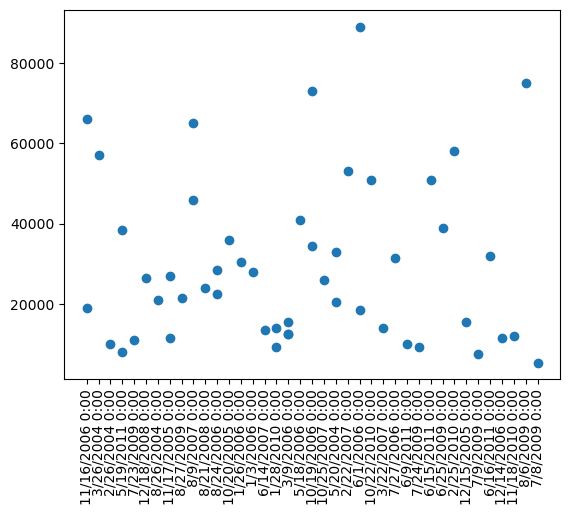

In [7]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:50],df["SalePrice"][:50]);
plt.xticks(rotation=90);

Text(0.5, 0, 'salesPrice')

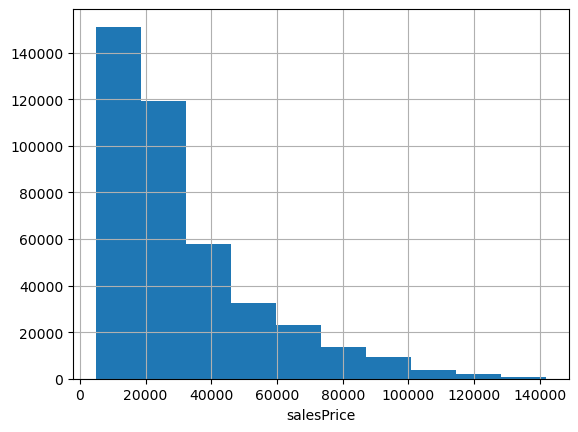

In [8]:
#frequency of sales Price
df["SalePrice"].hist()  # THE DATA IS SKEWED TO THE LEFT
plt.xlabel("salesPrice")

# Parsing dates using pandas



In [9]:
df=pd.read_csv("data/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [10]:
df["saledate"][:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

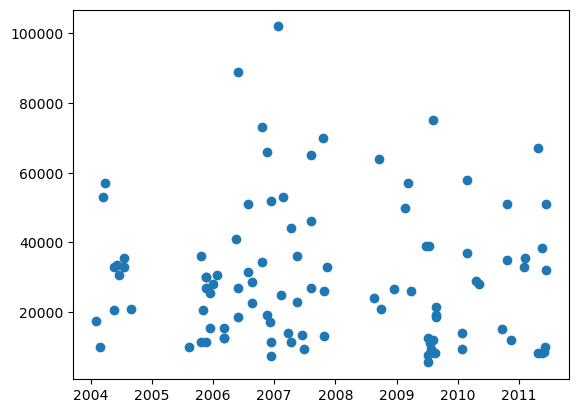

In [11]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:100],df["SalePrice"][:100]);

In [12]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

In [13]:
# sort df by saledate
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df["saledate"].head(100)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
113454   1989-01-31
62665    1989-01-31
78445    1989-01-31
233279   1989-02-01
28223    1989-02-01
Name: saledate, Length: 100, dtype: datetime64[ns]

# Making a copy of a original sorted dataset just in case 


In [14]:
df_tmp=df.copy()
df_tmp["saledate"].head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [15]:
# ADDING datetime paramter to the saledate 
df_tmp["saleYear"]=df_tmp["saledate"].dt.year
df_tmp["saleMonth"]=df_tmp["saledate"].dt.month
df_tmp["saleday"]=df_tmp["saledate"].dt.day
df_tmp["saleDayofWeek"]=df_tmp["saledate"].dt.dayofweek
df_tmp["saleDayofYear"]=df_tmp["saledate"].dt.dayofyear

In [16]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [17]:
# enriched our df with date time features ,we can remove the sale data column
df_tmp.drop("saledate",inplace=True,axis=1)

In [18]:
df_tmp["state"].value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

# Modelling

## Conerting String in to categories


In [19]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [20]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

False

In [21]:
# check the columns containg the strings

for label,content in df_tmp.items():
    if content.dtype=="object":
        df_tmp[label]=content.astype("category").cat.as_ordered()

In [22]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [23]:
df_tmp.state.cat.codes


205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [24]:
# check the ratio of missing value in every column
df_tmp.isnull().sum()/len(df)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

# Filling missing values

## Fill numeric missing values first

In [25]:
# checking the missing numeric values 
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        
        if pd.isnull(content).sum():
            print(label)
        
            

auctioneerID
MachineHoursCurrentMeter


In [26]:
#filling the values
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label+"is_missing"]=pd.isnull(content)
            df_tmp[label]=content.fillna(content.median())


In [27]:
df_tmp.tail()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleday,saleDayofWeek,saleDayofYear,auctioneerIDis_missing,MachineHoursCurrentMeteris_missing
410879,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,NaN,D38E,...,None or Unspecified,NaN,NaN,2012,4,28,5,119,False,True
412476,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,NaN,2064,...,NaN,NaN,NaN,2012,4,28,5,119,False,True
411927,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,NaN,337G,...,NaN,NaN,NaN,2012,4,28,5,119,False,True
407124,6266251,55000.0,509560,3357,149,99.0,1993,0.0,NaN,12G,...,NaN,NaN,NaN,2012,4,28,5,119,False,True
409203,6283635,34000.0,1869284,4701,149,99.0,1000,0.0,NaN,544H,...,NaN,Standard,Conventional,2012,4,28,5,119,False,True


In [28]:
df_tmp.isnull().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

# Filling and Turnning categorial value into number

In [29]:
#check for categoricakl missing values here
for label,content in df_tmp.items():
    if pd.api.types.is_categorical_dtype(content):
        if pd.isna(content).sum():
            print(label)
            


UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


C:\Users\nouma\AppData\Local\Temp\ipykernel_40844\29644128.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(content):


In [30]:
# filling values
for label, content in df_tmp.items():
    if pd.api.types.is_categorical_dtype(content):
        
        df_tmp[label + "_is_missing"] = pd.isnull(content)

            
           
       
        df_tmp[label] = pd.Categorical(content).codes + 1



C:\Users\nouma\AppData\Local\Temp\ipykernel_40844\3095463148.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(content):
C:\Users\nouma\AppData\Local\Temp\ipykernel_40844\3095463148.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(content):
C:\Users\nouma\AppData\Local\Temp\ipykernel_40844\3095463148.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(content):
C:\Users\nouma\AppData\Local\Temp\ipykernel_40844\3095463148.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) inste

In [31]:
# checking if there are any other missing value present
df_tmp.isnull()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
274835,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
141296,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
212552,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62755,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
412476,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
411927,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
407124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# MODELLING

In [32]:
df_tmp.info()


<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


In [33]:
%%time
# fitting data in to the model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])


CPU times: total: 18min 52s
Wall time: 1min 24s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [34]:
model.score(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

0.9875468079970562

#### we trained the and evaluated the same data set so the accuracy is invalid we need genealized result

In [35]:
#splitting the  data we have the train and valid set so we have malke our own validation set to make ec=valuation
df_tmp.saleYear


205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int32

In [36]:
df_tmp["saleYear"].value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [37]:

#split data into training and validation
df_val=df_tmp[df_tmp["saleYear"]==2012]
df_train=df_tmp[df_tmp["saleYear"]!=2012]
len(df_val),len(df_train)


(11573, 401125)

In [38]:
# split data into x and y 

x_train,y_train=df_train.drop("SalePrice",axis=1),df_train["SalePrice"]
x_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val["SalePrice"]



# Evaluation function ...
## using the RMSLE the Dataset is skewed 

            



In [39]:
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    "calculate root mean squared log erroe "
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

def show_scores(model):
    train_preds=model.predict(x_train)
    valid_preds=model.predict(x_valid)
    scores={"trained_MAE":mean_absolute_error(y_train,train_preds),
            "valid_MAE": mean_absolute_error(y_valid,valid_preds),
            "Training Rmlse":rmsle(y_train,train_preds),
            "valid rmsle":rmsle(y_valid,valid_preds),
            "training r2":r2_score(y_train,train_preds),
            "valid r2_score":r2_score(y_valid,valid_preds)}
    return scores

# Reducing the data to speed up the process


In [40]:
#change max_samples value in the model

model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
model.fit(x_train,y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [41]:
show_scores(model)

{'trained_MAE': 5561.2988092240585,
 'valid_MAE': 7177.26365505919,
 'Training Rmlse': 0.257745378256977,
 'valid rmsle': 0.29362638671089003,
 'training r2': 0.8606658995199189,
 'valid r2_score': 0.8320374995090507}

# HYPERPARAMETER TUNNING USING RANDOMIZEDSEARCHCV

In [42]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "log2",None],
           "max_samples": [10000]}
    






rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=rf_grid,n_iter=2,cv=5,verbose=True)



CPU times: total: 0 ns
Wall time: 0 ns


In [43]:
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt', 'log2',
                                                         None],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [44]:
show_scores(rs_model)# evaluatio done by training on 10000 samples only

{'trained_MAE': 6335.114591554363,
 'valid_MAE': 7644.59873871046,
 'Training Rmlse': 0.28617881518536803,
 'valid rmsle': 0.3088340059828915,
 'training r2': 0.8219561651612342,
 'valid r2_score': 0.8087941021905763}

In [45]:
rs_model.best_estimator_

RandomForestRegressor(max_features=0.5, max_samples=10000, min_samples_leaf=9,
                      min_samples_split=8, n_estimators=90, n_jobs=-1,
                      random_state=42)

## Train an model with Best hyperparamater
* note: we got it it after 100 iterations

In [46]:
%%time
from sklearn.ensemble import RandomForestRegressor
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

ideal_model.fit(x_train,y_train)

CPU times: total: 3min 12s
Wall time: 15.3 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [47]:
ideal_model.score(x_valid,y_valid)

0.8818019502450094

In [48]:
show_scores(ideal_model),   show_scores(rs_model)

({'trained_MAE': 2953.8161137163484,
  'valid_MAE': 5951.247761444453,
  'Training Rmlse': 0.14469006962371858,
  'valid rmsle': 0.2452416398953833,
  'training r2': 0.9588145522577225,
  'valid r2_score': 0.8818019502450094},
 {'trained_MAE': 6335.114591554363,
  'valid_MAE': 7644.59873871046,
  'Training Rmlse': 0.28617881518536803,
  'valid rmsle': 0.3088340059828915,
  'training r2': 0.8219561651612342,
  'valid r2_score': 0.8087941021905763})

In [49]:
from sklearn.metrics import mean_absolute_error

y_mean = [y_train.mean()] * len(y_valid)
baseline_mae = mean_absolute_error(y_valid, y_mean)
baseline_mae

19898.374860039934

# Making Prediction on Test Data

In [50]:
#import test data

df_test=pd.read_csv("data/Test.csv",low_memory=False,parse_dates=["saledate"])

In [51]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

### Prepocessing data

In [53]:
def preprocess_data(df):
    df["saleYear"]=df["saledate"].dt.year
    df["saleMonth"]=df["saledate"].dt.month
    df["saleday"]=df["saledate"].dt.day
    df["saleDayofWeek"]=df["saledate"].dt.dayofweek
    df["saleDayofYear"]=df["saledate"].dt.dayofyear
    df.drop("saledate",axis=1,inplace=True)
    #filling the values
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"is_missing"]=pd.isnull(content)
                df[label]=content.fillna(content.median())
    for label,content in df.items():
        if content.dtype=="object":
            df[label]=content.astype("category").cat.as_ordered()
                
    for label, content in df.items():
        if pd.api.types.is_categorical_dtype(content):
        
            df[label + "_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1

            
           
       
        


    return df

In [54]:
df_test=preprocess_data(df_test)

C:\Users\nouma\AppData\Local\Temp\ipykernel_40844\3923576083.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(content):
C:\Users\nouma\AppData\Local\Temp\ipykernel_40844\3923576083.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(content):
C:\Users\nouma\AppData\Local\Temp\ipykernel_40844\3923576083.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(content):
C:\Users\nouma\AppData\Local\Temp\ipykernel_40844\3923576083.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) i

# Prediction 

In [55]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [56]:
# test_preds=ideal_model.predict(df_test)

In [57]:
# manualy adding df_test to have auctioneerIDis_missing


df_test["auctioneerIDis_missing"]=False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [58]:

# Align the columns of x_test to match x_train
df_test = df_test[x_train.columns]





In [59]:
test_preds=ideal_model.predict(df_test)
test_preds

array([17030.00927386, 14355.53565165, 46623.08774286, ...,
       11964.85073347, 16496.71079281, 27119.99044029])

In [60]:
df_preds=pd.DataFrame()

df_preds["SalesID"]=df_test["SalesID"]

In [61]:
df_preds["SalesPrice"]=test_preds

In [62]:
df_preds

,SalesID,SalesPrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
...,...,...
12452,6643171,39966.363007
12453,6643173,12049.704433
12454,6643184,11964.850733
12455,6643186,16496.710793


In [63]:
#export prediction
df_preds.to_csv("data/predictions_test_data.csv")

In [64]:
# checking prediction on randosearccv model

test_preds2=rs_model.predict(df_test)



In [65]:
test_preds2

array([19115.7761059 , 18126.17827858, 56032.7440707 , ...,
       12959.2508194 , 17347.74632162, 22693.95639611])

# Feature Importance

In [66]:
# find the feature importance of our best model
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [67]:
# helper functuion for plotting feature importance
def plot_features(columns,importances,n=20):
    df=(pd.DataFrame({"features":columns,
                      "feature_importances":importances})
        .sort_values("feature_importances",ascending=False)
        .reset_index(drop=True))
    fig,ax=plt.subplots()
    ax.barh(df["features"][:n],df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature_importances")
    

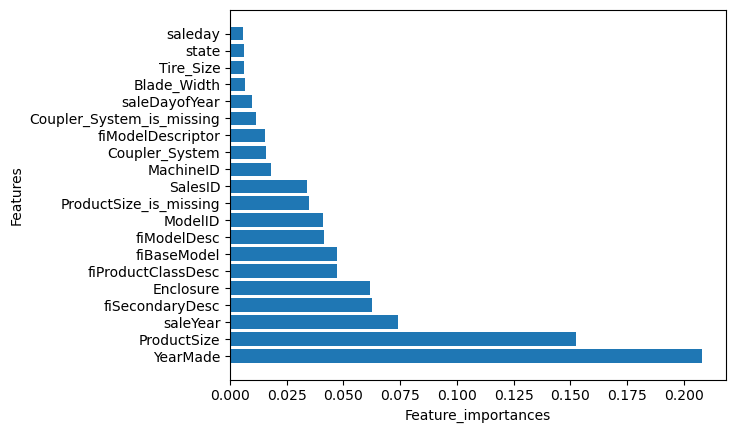

In [68]:
plot_features(x_train.columns,ideal_model.feature_importances_)

# Finding how effective our model is in predicting or forecasting prices

In [69]:
from sklearn.metrics import mean_absolute_error

# Calculate the mean of the training target values
y_mean = [y_train.mean()] * len(y_valid)

# Compute the MAE between the actual and predicted values
baseline_mae = mean_absolute_error(y_valid, y_mean)
print(f"Baseline MAE: {baseline_mae:,.2f}")



Baseline MAE: 19,898.37


In [70]:
# Assuming y_pred contains your model's predictions
y_preds=ideal_model.predict(x_valid)
model_mae = mean_absolute_error(y_valid, y_preds)
print(f"Model MAE: ₹{model_mae:,.2f}")


Model MAE: ₹5,951.25


In [71]:
# Calculate the percentage improvement
improvement_percentage = ((baseline_mae - model_mae) / baseline_mae) * 100
print(f"Improvement: {improvement_percentage:.2f}%")


Improvement: 70.09%


In [74]:
y_valid_preds=ideal_model.predict(x_valid)

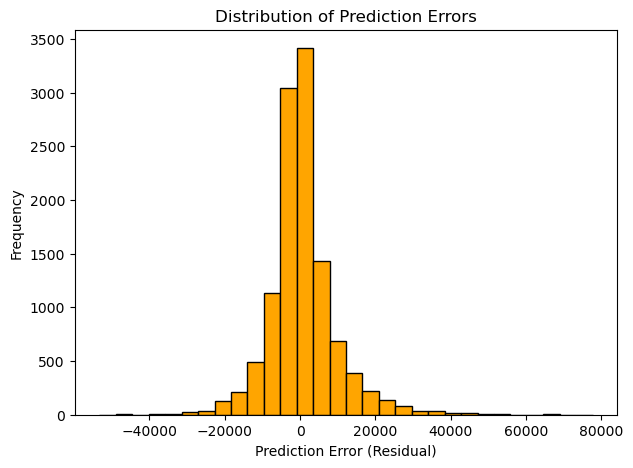

In [75]:
residuals = y_valid - y_valid_preds

plt.figure(figsize=(7,5))
plt.hist(residuals, bins=30, color='orange', edgecolor='black')
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()


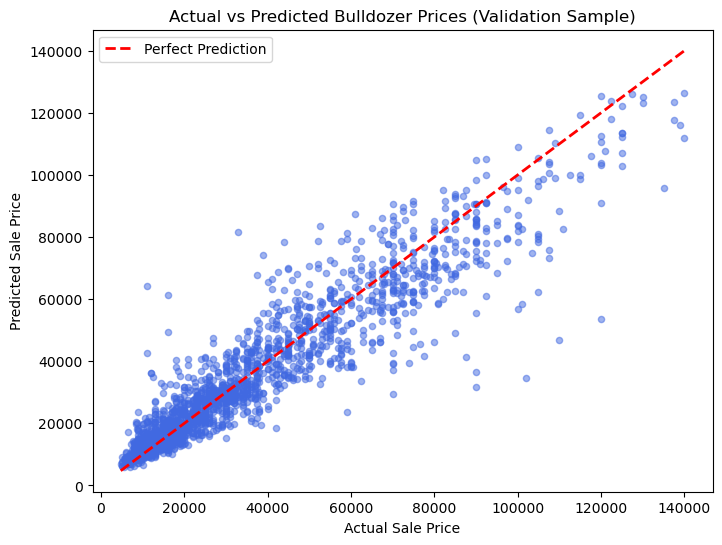

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure arrays are aligned
y_val_series = y_valid.reset_index(drop=True)       # reset to 0...n-1
y_val_pred_series = pd.Series(y_valid_preds).reset_index(drop=True)

# Random sample of 2000 points
sample_size = min(2000, len(y_val_series))
sample_idx = np.random.choice(len(y_val_series), size=sample_size, replace=False)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_val_series.iloc[sample_idx], y_val_pred_series.iloc[sample_idx],
            alpha=0.5, color="royalblue", s=20)

# Perfect prediction line
plt.plot([y_val_series.min(), y_val_series.max()],
         [y_val_series.min(), y_val_series.max()],
         'r--', lw=2, label="Perfect Prediction")

plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Bulldozer Prices (Validation Sample)")
plt.legend()


# Conclusion

##  Reduced pricing errors by ~70%, translating  to an estimated ~30% improvement in pricing cost efficiency
